# INSIGHTS OF STARTING A MOVIE STUDIO


## BUSINESS UNDERSTANDING

Microsoft is an American technology coorperation headquatered in Washington. It was founded in 1975 by Bill Gates and Paul Allen. It is best known for creating Window operating system, Intenet Explorer and Edge web browsers. It also has fragship in hardware products such as personal computers.

With the growth of film industry and creation of original vedios in the recent years, Microsoft intend to venture into the business of creating movies by establishing their new movie studio.


The Project intend to collect data from various movie sites, analyze ,evaluate the performance of movie business and give well informed insights.

### PROBLEM STATEMENT
Give informed insights of creating  movie studio. Whish will be profitable and competative in the current  movie market.

#### MAIN OBJECTIVE

To give Microsoft insight that will guide them in creation of a movie studio using the current market data.

##### SPECIFIC OBJECTIVES
  1. Give the estimate budget requred in a film production
  2. Evaluate the most populat genres in the market
  3. Give an estimate profitability a movie
  4. Factors to consinder while creating a movie



### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 
import os

In [2]:
# checking the current working directory
os.getcwd()

'C:\\Users\\christine\\OneDrive\\Desktop\\classwork\\project'

In [3]:
#changing the peferred working directory
os.chdir("C:\\Users\\christine\\OneDrive\\Desktop\\classwork\\project")


### Reading data 

In [4]:
#loading the csv files
bom_movies = pd.read_csv("bom.movie_gross.csv")
bom_movies.head()



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
tn_movies = pd.read_csv("tmdb.movies.csv")
tn_movies.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
tn_movies.shape

(26517, 10)

In [7]:
tn_budget = pd.read_csv("tn.movie_budgets.csv")
tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
tn_budget.shape

(5782, 6)

The data has 6 columns and 5782

Data from IM Database

In [9]:
#connecting to im database
conn = sqlite3.connect("im") 
cur = conn.cursor()
#viewing the tables
table="""SELECT name FROM sqlite_master  
  WHERE type='table';"""
cur.execute(table)
cur.fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Fetching movie_basics table and Movie_ratings table

In [10]:
q= """
SELECT movie_id,
primary_title,
original_title
start_title,
start_year,
runtime_minutes,
genres,
original_title,
averagerating,
numvotes
FROM movie_basics
JOIN movie_ratings
USING(movie_id)

;
"""
movie_data = pd.read_sql(q,conn)
movie_data.head()

,movie_id,primary_title,start_title,start_year,runtime_minutes,genres,original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Ashad Ka Ek Din,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",La Telenovela Errante,6.5,119


##### Data cleaning and wrangling

In [11]:
# checking the total sun of missing values per column
bom_movies.isna().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Percentage missing values per column

In [12]:
missing = ((((bom_movies.isna().sum())/len(bom_movies)).round(4)).to_dict())
pd.DataFrame(missing.items(),columns=["column","% missing"])

,column,% missing
0,title,0.0000
1,studio,0.0015
2,domestic_gross,0.0083
3,foreign_gross,0.3986
4,year,0.0000


In [13]:
#checking for missing value
tn_movies.isna().sum()


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [14]:
tn_budget.isna().sum()
# the data lacs any missing values

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [15]:
#Checking for the data types
bom_movies.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

replacing ( ,)  in foreign_gross columns

In [16]:
bom_movies["foreign_gross"]=bom_movies["foreign_gross"].str.replace(",","", regex = True)


transforming foreign_gross from a sring to intenger

In [17]:
bom_movies["foreign_gross"]=pd.to_numeric(bom_movies["foreign_gross"])

In [18]:
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [19]:
tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


 removing $ and comma (,)

In [20]:
tn_budget["worldwide_gross"]=tn_budget["worldwide_gross"].str.replace("$","", regex = True).replace(",","", regex = True)
tn_budget["domestic_gross"]=tn_budget.domestic_gross.str.replace("$","", regex = True).replace(",","", regex = True)
tn_budget["production_budget"]=tn_budget["production_budget"].str.replace("$","", regex = True).replace(",","", regex = True)

Changing the data type from string to intenger

In [21]:
tn_budget["domestic_gross"]=pd.to_numeric(tn_budget["domestic_gross"])
tn_budget["worldwide_gross"]=pd.to_numeric(tn_budget["worldwide_gross"])
tn_budget["production_budget"]=pd.to_numeric(tn_budget["production_budget"])


Checking for outliers

In [22]:
plt.style.use("ggplot")

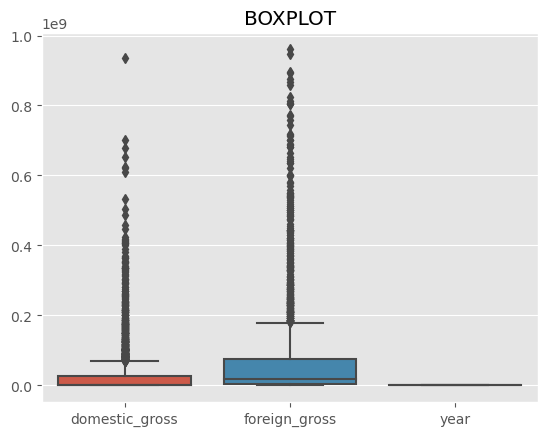

In [23]:
sns.boxplot(bom_movies)
plt.title("BOXPLOT")
plt.show()

Since there is alot of outliers in the data we cannot replace the missing values using mean or the other mearsures of central tendancy

using line plot to be anle to trace changes to tha data when we repplace the missing values

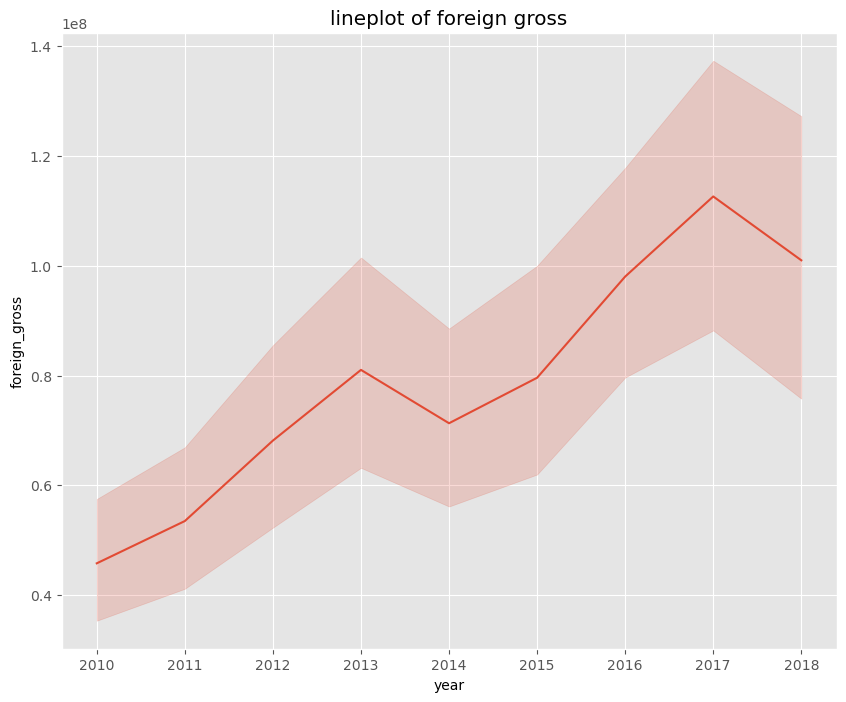

In [24]:
# observing both domestic and foreign gross with time
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x=bom_movies.year,y=bom_movies.foreign_gross)
ax.set_title("lineplot of foreign gross")
plt.show()

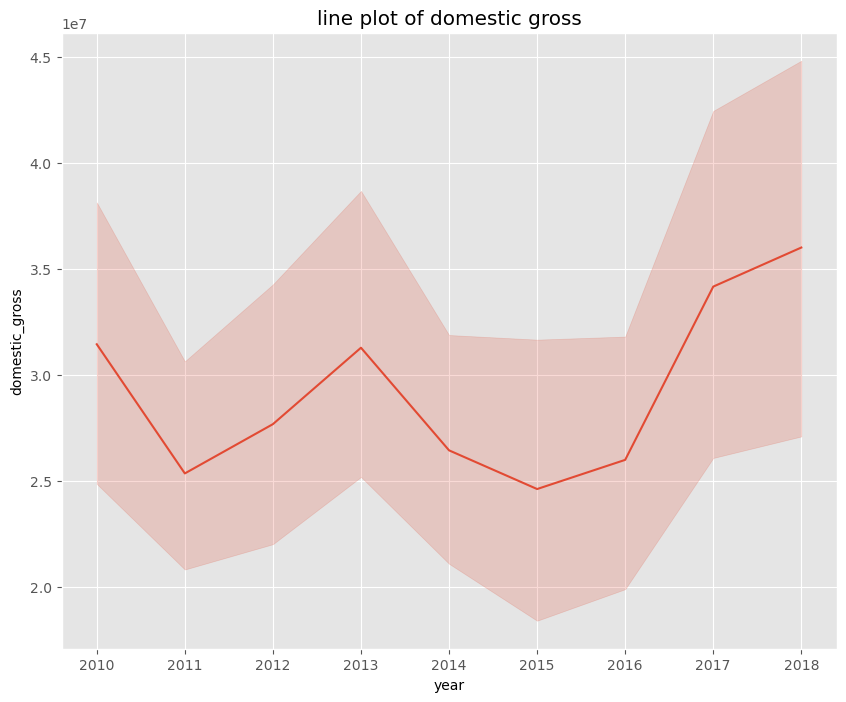

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x=bom_movies.year,y=bom_movies.domestic_gross)
ax.set_title("line plot of domestic gross")
plt.show()


- since there is a linaer increase in gross domestic, replacing the na values in domestic_gross using interpolation and the method being linaer
- while in the foreign gross the filling na using the forward fill.

In [26]:

bom_movies["foreign_gross"]=bom_movies["foreign_gross"].fillna(method="ffill")
bom_movies["domestic_gross"]=bom_movies["domestic_gross"].interpolate(method = "linear")


Checking if there is a siginificant change using the line plot

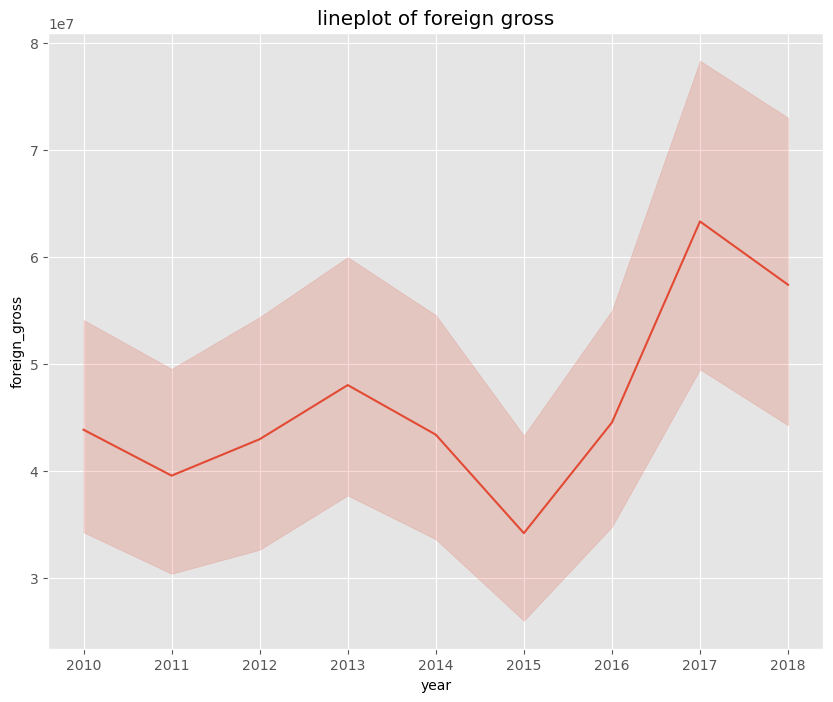

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x=bom_movies.year,y=bom_movies.foreign_gross)
ax.set_title("lineplot of foreign gross")
plt.show()

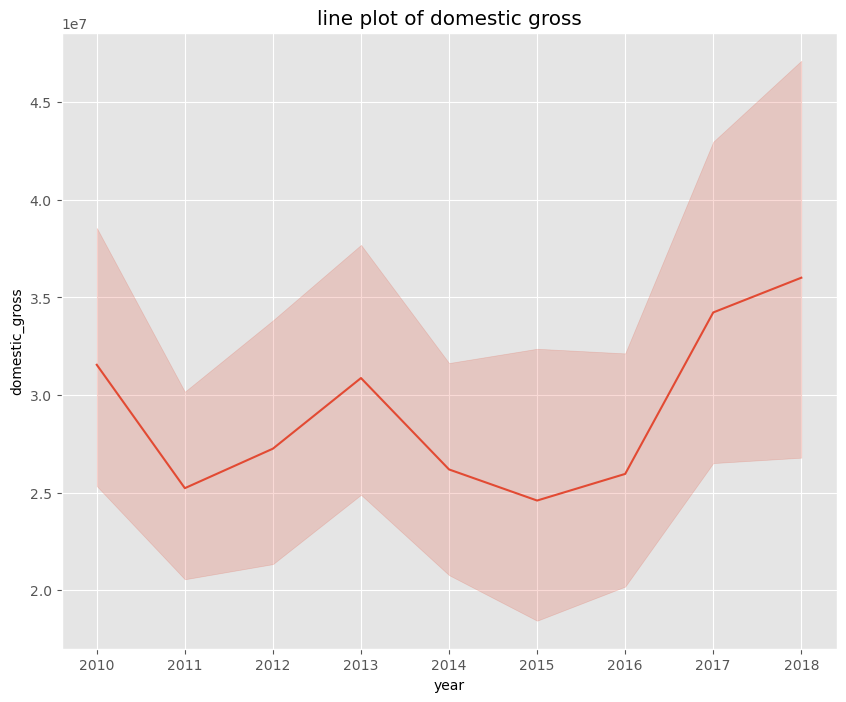

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x=bom_movies.year,y=bom_movies.domestic_gross)
ax.set_title("line plot of domestic gross")
plt.show()


 The line plot is to trace the change of what that has happened with time whaen will replace na in both domestic and the foreign_gross for the studio since the missing values are just a small percentage we can drop the rows with na and also it is difficult to replace the categorical data


In [29]:
bom_movies.dropna(inplace=True)

In [30]:
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

#### data Exploration

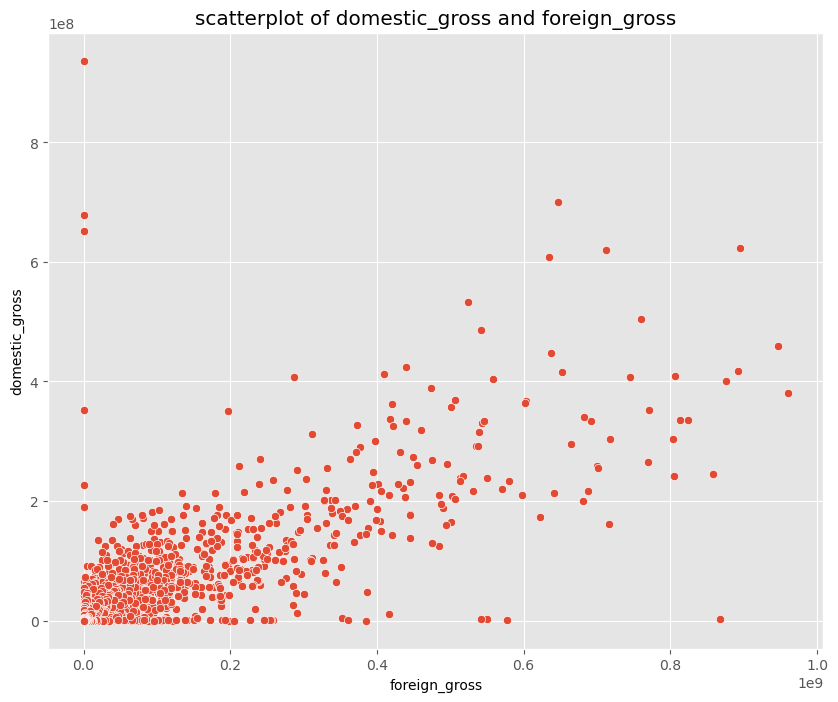

In [31]:
#Checking if there is correlation between domestic_gross and foreign_gross
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.scatterplot(data=bom_movies,y="domestic_gross",x="foreign_gross")
ax.set_title("scatterplot of domestic_gross and foreign_gross")
plt.show()


Studios that made alot of production in the period 

In [32]:
# Studios that made alot of production in the period 
studios = bom_movies.studio.value_counts().index[:10].tolist()
count =  bom_movies.studio.value_counts()[:10].tolist()


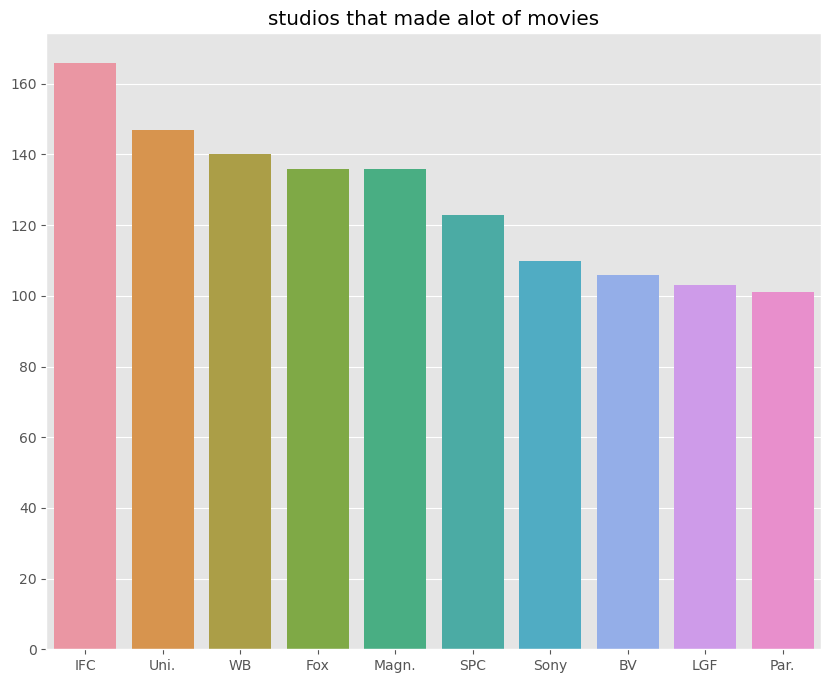

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.barplot(data=bom_movies,x=studios,y=count)
ax.set_title("studios that made alot of movies")
plt.show()

Ten most produced genres

In [34]:

genre = movie_data.genres.value_counts().index[:10].tolist()
count = movie_data.genres.value_counts()[:10].tolist()


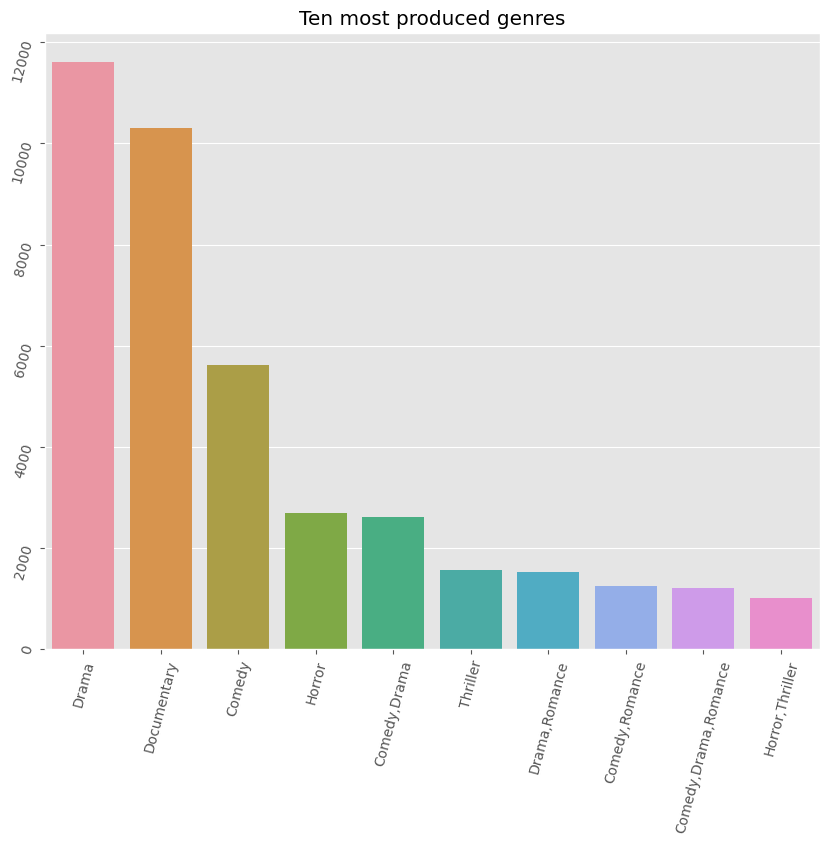

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.barplot(x = genre,y = count)
ax.tick_params(rotation =75)
ax.set_title("Ten most produced genres")
plt.show()

Creating a profit column after adding the domestic gross and worldwide gross and substructing production budget

In [36]:
tn_budget["profit"] = (tn_budget["domestic_gross"] + tn_budget["worldwide_gross"]) - tn_budget["production_budget"]

In [37]:
tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


a Scatter plot between production budget and profit

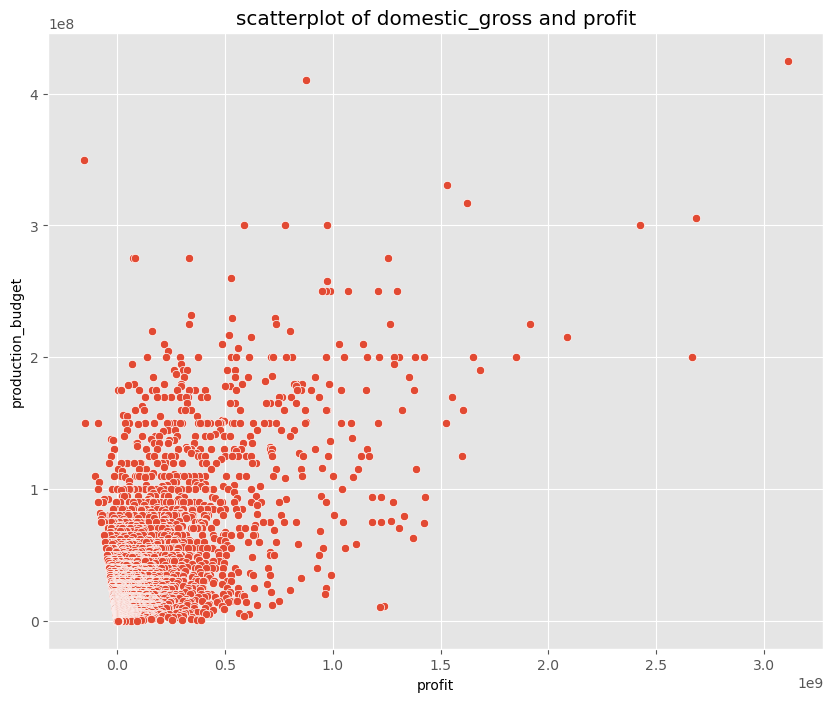

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.scatterplot(data=tn_budget,y="production_budget",x="profit")
ax.set_title("scatterplot of domestic_gross and profit")
plt.show()


In [39]:
tn_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
profit                int64
dtype: object

C:\Users\christine\AppData\Local\Temp\ipykernel_4372\3180349066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tn_budget["profit"])


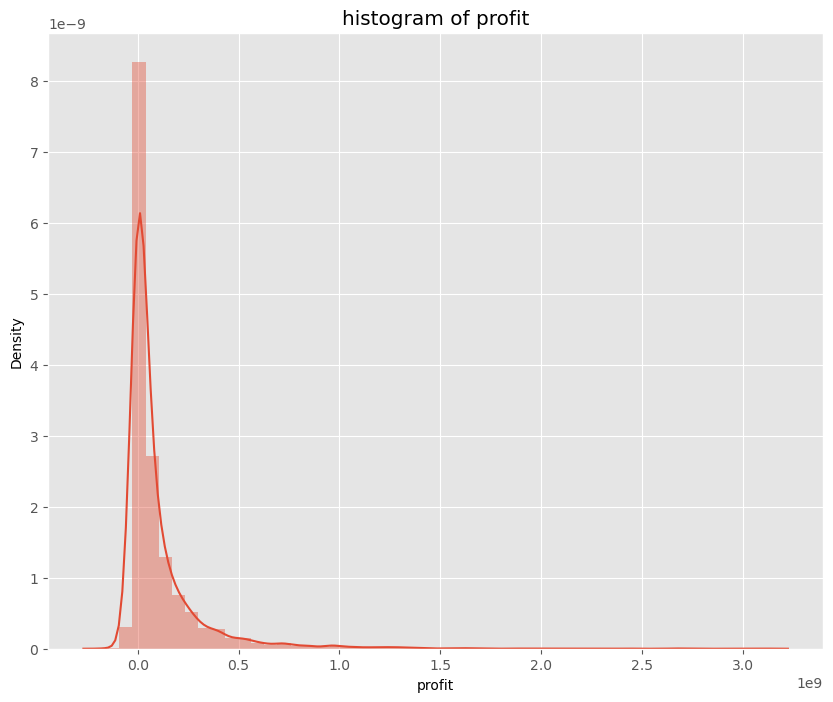

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.distplot(tn_budget["profit"])
ax.set_title("histogram of profit")
plt.show()

From the plot we see that the data is normaly distributed but right skrewed

#### Data analysis

Getting statistical summary of different data sets

In [41]:
bom_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_gross,3382.0,2.864325e+07,6.684536e+07,100.0,121000.0,1400000.0,27775000.0,936700000.0
foreign_gross,3382.0,4.550116e+07,1.125962e+08,600.0,182000.0,2900000.0,29500000.0,960500000.0
year,3382.0,2.013960e+03,2.477735e+00,2010.0,2012.0,2014.0,2016.0,2018.0


In [42]:
movie_data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,73856.0,2014.276132,2.614807,2010.0,2012.0,2014.0,2016.0,2019.0
runtime_minutes,66236.0,94.654040,208.574111,3.0,81.0,91.0,104.0,51420.0
averagerating,73856.0,6.332729,1.474978,1.0,5.5,6.5,7.4,10.0
numvotes,73856.0,3523.662167,30294.022971,5.0,14.0,49.0,282.0,1841066.0


In [43]:
tn_budget.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5782.0,5.037236e+01,2.882108e+01,1.0,25.00,50.0,75.0,1.000000e+02
production_budget,5782.0,3.158776e+07,4.181208e+07,1100.0,5000000.00,17000000.0,40000000.0,4.250000e+08
domestic_gross,5782.0,4.187333e+07,6.824060e+07,0.0,1429534.50,17225945.0,52348661.5,9.366622e+08
worldwide_gross,5782.0,9.148746e+07,1.747200e+08,0.0,4125414.75,27984448.5,97645836.5,2.776345e+09
profit,5782.0,1.017730e+08,2.108880e+08,-157475300.0,-309822.25,24995377.5,111164787.5,3.111853e+09


correlation between domestic_gross and foreign_gross 

In [44]:
np.corrcoef(bom_movies["domestic_gross"],bom_movies["foreign_gross"])


array([[1.        , 0.79191261],
       [0.79191261, 1.        ]])

There is a strong positive correlation between Domestic_gross and foreign_gross

In [45]:
np.corrcoef(tn_budget["production_budget"],tn_budget["profit"])

array([[1.        , 0.64357987],
       [0.64357987, 1.        ]])

There is a  moderate positive correlation between production budget and profit

In [46]:
       
mean = round(np.mean(movie_data.runtime_minutes),4)# The averange runtime munites
std_deviation = round(np.std(movie_data.runtime_minutes),4) # The standard deviation of runtime minutes
print(f"The average run time is {mean}")
print(f"The deviation from the mean is {std_deviation}")

The average run time is 94.654
The deviation from the mean is 208.5725


The std_deviation is very high indicating there is some outliers

Removing the outliers that are affectin the mean and std

In [47]:
q_low = movie_data["runtime_minutes"].quantile(0.25)
q_hi  = movie_data["runtime_minutes"].quantile(0.75)

df_filtered = movie_data[(movie_data["runtime_minutes"] < q_hi) & (movie_data["runtime_minutes"] > q_low)]

Getting the averange and std_deviation when the data doed not have outliers

In [48]:
mean = round(np.mean(df_filtered.runtime_minutes),4)# The averange runtime munites
std_deviation = round(np.std(df_filtered.runtime_minutes),4) # The standard deviation of runtime minutes
print(f"The average run time is {mean}")
print(f"The deviation from the mean is {std_deviation}")

The average run time is 91.7826
The deviation from the mean is 5.7352


Average production cost


In [49]:
pmean = np.mean(tn_budget["production_budget"])
av_income = np.mean (tn_budget["profit"])
print(f"The averange production cost of a movie is {round(pmean,2)}")
print(f"The averange profit per movie is {round(av_income,2)}")

The averange production cost of a movie is 31587757.1
The averange profit per movie is 101773030.68


#### Conclusion

- The most popular genre of the movie should be considered
- The there is a high correlation between the pruduction input and the profit
- The domestic_ gross is highly correlated to the foreign_gross indicating if a movie performs well in the domestic market then it will also do well in the external market.
- There is high competition  among the dtudios when it comes to production.
- The movie business seems to have a high return meanung it is profitable
 
 
 #### Recommendation
 
- The company should consider the production of the following genres, Drama , Documentary and comedy since they are more popular 
-  The company should set aside an average of 31587757.1 dollars for the first movie production
- The company should expect a return 101773030.68 with a little deviation
- To get the experienve of movie production the company should partner with other movie studio or higher people who have experience in movie production.
